# Test Levy flight - 2
Levy - u=1.5, u=2, u=2.5
- Run a biologically realistic number of steps (100)
- On a big domain
- 5000 targets
- Fix radius

In [1]:
import shutil
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import explorationlib
from explorationlib import agent
from explorationlib import local_gym as gym

from explorationlib.run import experiment
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import show_gif

from explorationlib import score
from explorationlib.score import search_efficiency
from explorationlib.score import first_reward
from explorationlib.score import average_reward
from explorationlib.score import total_reward

pygame 2.0.1 (SDL 2.0.14, Python 3.6.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Explore $u$ (exponent)


In [7]:
# How long to run? Longer is better, but slower.
num_steps = 100
num_experiments = 1000
detection_radius = 2
num_targets = 5000 # 5000-50000
target_boundary = (100, 100)

# -
min_length = 0.1
step_size = 0.1

# Create env 
env = gym.Field()
targets = gym.uniform_targets(num_targets, target_boundary)
values = gym.constant_values(targets, 1)
env.add_targets(targets, values, detection_radius=detection_radius)

# and agents
levy15 = agent.Levy2d(
    min_length=min_length, 
    exponent=1.5, 
    detection_radius=detection_radius,
    step_size=step_size)
levy20 = agent.Levy2d(
    min_length=min_length, 
    exponent=2.0, 
    detection_radius=detection_radius,
    step_size=step_size)
levy25 = agent.Levy2d(
    min_length=min_length, 
    exponent=2.5, 
    detection_radius=detection_radius,
    step_size=step_size)

# !
levy15_exp = experiment(
    "test_levy_15.pkl", 
    levy15, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments, 
    dump=False
)
levy20_exp = experiment(
    "test_levy_15.pkl", 
    levy20, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments, 
    dump=False
)
levy25_exp = experiment(
    "test_levy_25.pkl", 
    levy25, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments, 
    dump=False
)

test_levy_25: 100%|██████████| 1000/1000 [00:19<00:00, 51.15it/s]


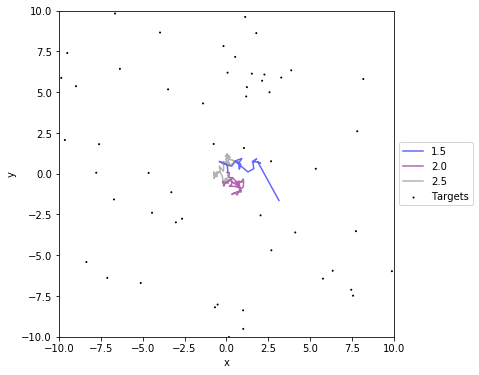

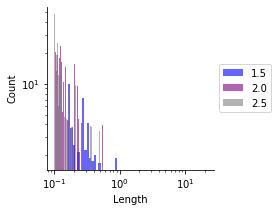

In [8]:
num_experiment = 4
plot_boundary = (10, 10)

# Example bout
ax = None
ax = plot_position2d(
    select_exp(levy15_exp, num_experiment),
    boundary=plot_boundary,
    label="1.5",
    color="blue",
    alpha=0.6,
    figsize=(6, 6),
    ax=ax,
)
ax = plot_position2d(
    select_exp(levy20_exp, num_experiment),
    boundary=plot_boundary,
    label="2.0",
    color="purple",
    alpha=0.6,
    figsize=(6, 6),
    ax=ax,
)
ax = plot_position2d(
    select_exp(levy25_exp, num_experiment),
    boundary=plot_boundary,
    label="2.5",
    color="grey",
    alpha=0.6,
    figsize=(6, 6),
    ax=ax,
)
ax = plot_targets2d(
    env,
    boundary=plot_boundary,
    color="black",
    alpha=1,
    label="Targets",
    ax=ax,
)

# Length dist example
ax = None
ax = plot_length_hist(
    select_exp(levy15_exp, num_experiment),
    loglog=True,
    bins=60,
    density=True,
    alpha=0.6,
    label="1.5",
    color="blue",
    ax=ax,
)
ax = plot_length_hist(
    select_exp(levy20_exp, num_experiment),
    loglog=True,
    bins=60,
    density=True,
    alpha=0.6,
    label="2.0",
    color="purple",
    ax=ax,
)
ax = plot_length_hist(
    select_exp(levy25_exp, num_experiment),
    loglog=True,
    bins=60,
    density=True,
    alpha=0.6,
    label="2.5",
    color="grey",
    ax=ax,
)
sns.despine()

search_efficiency: 100%|██████████| 1000/1000 [00:04<00:00, 223.23it/s]


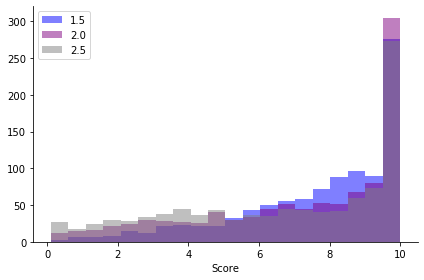

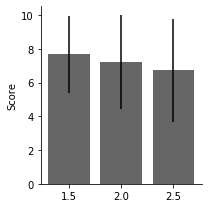

In [9]:
# Results
results = [levy15_exp, levy20_exp, levy25_exp]
names = ["1.5", "2.0", "2.5"]
colors = ["blue", "purple", "grey"]

# Score by eff
scores = []
for name, res, color in zip(names, results, colors):
    r = search_efficiency(res)
    # r = total_reward(res)
    scores.append(r)   

# Dists
for (name, s, c) in zip(names, scores, colors):
    plt.hist(s, label=name, color=c, alpha=0.5, bins=20)
    plt.legend()
    plt.xlabel("Score")
    plt.tight_layout()
    sns.despine()

# Tabulate
m, sd = [], []
for (name, s, c) in zip(names, scores, colors):
    m.append(np.mean(s))
    sd.append(np.std(s))

# Plot means
fig = plt.figure(figsize=(3, 3))
plt.bar(names, m, yerr=sd, color="black", alpha=0.6)
plt.ylabel("Score")
plt.tight_layout()
sns.despine()